The purpose of this notebook is to explore and get GPT evalauted fluency score for truncation & recursion summary methods AND plot them for visualization.

** All the datasets, generated summaries, and evaluation results can be found in my shared Google Drive folder: https://drive.google.com/drive/folders/1sNoJxaShjifrt_AqyG5_sZYGxHknqfOM?usp=sharing

# Load stored abstracts

First the generated ones

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/pubmed/generated_abstracts_4096.csv')
df.head()

,index,distilbart-pubmed-20k,bart-pubmed-20k,pegasus-pubmed-20k,primera-pubmed-20k,led-pubmed-20k,longformer-pubmed-20k
0,0,background : anxiety is the most prominent and...,background. \n anxiety is the most prominent a...,the aim of this study was to investigate the r...,background. \n recent research has shown that ...,backgroundanxiety affects quality of life in t...,background. \n parkinson's disease ( pd ) is t...
1,1,small non - coding small rnas regulate gene ex...,small non - coding rnas are transcribed into m...,background : small non - coding rnas ( mirnas ...,mirna ( mirna ) is a small non - coding rna wh...,small non - coding rnas are transcribed into m...,small non - coding rnas ( mirnas ) are a class...
2,3,background : congenital adrenal hyperplasia ( ...,background : congenital adrenal hyperplasia ( ...,background : congenital adrenal hyperplasia ( ...,background : congenital adrenal hyperplasia ( ...,introductioncongenital adrenal hyperplasia ( c...,congenital adrenal hyperplasia ( cah ) is a ra...
3,6,background : the family is the cornerstone of ...,background : the family is the cornerstone of ...,background : the purpose of this study was to ...,background : the aim of this study was to dete...,background : the aim of this study was to anal...,background : the purpose of this study was to ...
4,7,background : cardiovascular diseases are among...,background. \n the purpose of this study is to...,background : anxiety is a common psychological...,background : the aim of the present study was ...,background : coronary artery disease is the mo...,background : cardiovascular diseases are among...


Then load human written abstracts

In [ ]:
# load indices

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import transformers
import pandas as pd

# Load the CSV file into a DataFrame
token_df_test = pd.read_csv('/content/drive/My Drive/pubmed/token_df_test.csv')

token1024_df_test = pd.read_csv('/content/drive/My Drive/pubmed/token1024_df_test.csv')

In [ ]:
truth_df = token_df_test
truth_df1024 = token1024_df_test
truth_df.head()

,Unnamed: 0,article_len,abstract_len,article,abstract
0,0,3820,257,anxiety affects quality of life in those livin...,research on the implications of anxiety in par...
1,1,3409,125,small non - coding rnas are transcribed into m...,"small non - coding rnas include sirna , mirna ..."
2,3,1170,187,congenital adrenal hyperplasia ( cah ) refers ...,congenital adrenal hyperplasia is a group of a...
3,6,2273,346,the family is the cornerstone of human social ...,background : since the family is a social syst...
4,7,3444,333,development of human societies and industriali...,background and objective : anxiety and depre...


# Prompt GPT-3.5

Evaluate fluency based on the guideline: https://www-nlpir.nist.gov/projects/duc/duc2007/quality-questions.txt


In [ ]:
import openai

# Define your OpenAI API key
openai.api_key = ''# MY UNIQUE KEY


In [ ]:
guideline = """
1 Grammaticality

  There should be no datelines, system-internal formatting,
  capitalization errors or obviously ungrammatical sentences (e.g.,
  fragments, missing components).

2 Non-redundancy

  There should be no unnecessary repetition, like whole sentences that
  are repeated, or repeated facts, or the repeated use of a noun phrase when a pronoun would suffice.

3 Referential clarity

  A reference is unclear if an entity is referenced but its
  identity, meaning, or relation in the text remains unclear.


4 Focus

  It should have a focus; sentences should only contain
  information that is related to the rest of the summary.


5 Structure and Coherence

  It should be well-structured and well-organized, not just a heap of related information, but should
  build from sentence to sentence to a coherent body of information about a topic.

"""

In [ ]:
def score_text(text, guideline, prompt):
    messages=[
      {"role": "system", "content": prompt},
      {"role": "user", "content": text}
    ]

    # Call the OpenAI API to generate the score
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo-0125",
        messages = messages,
        max_tokens=500,
        temperature=0,
        stop=None
    )

    # Extract the score from the API response
    print(response)
    score = response.choices[0].message.content #response.choices[0].text.strip()

    return score

# Explore Prompt and text number variation

Explore how the number of text present and the order, and the wording of prompt can affect the scoring

In [ ]:
# Experiment with one text evaluation
text = "background : anxiety is the most prominent and prevalent mood disorder in parkinson's disease ( pd ) patients. however, few studies have specifically investigated the relationship between anxiety and cognition in pd.methods:the cross - sectional data was taken from a patient database at the brain and mind centre, university of sydney, in order to determine the effect of anxiety on cognition.materials and methods : seventeen patients with anxiety and thirty - three pd patients without anxiety were included in this study.results:in this study ( 5 pd with anxiety ; 5 pdr without anxiety ) were also excluded if they had other neurological disorders such as anxiety or depression.conclusions:the present study showed a strong negative relationship between trait anxiety ( both state and trait ) and overall cognitive performance ( measured by the total of the repeatable battery for the assessment of neuropsychological status index. furthermore, trait anxiety was negatively associated with each of the cognitive domains assessed by the rbans ( i.e., immediate memory, visuospatial construction, language, attention, attention, and delayed memory ) in contrast, anxiety was significantly correlated with neuropsychology measures of attention and executive and visu spatial functions.conclusion:the results of this study suggest that anxiety and depression are often related and coexist in pD patients, but it is also striking that, to date, no study has examined whether anxiety differentially affects cognition in patients with pd. in addition to the influence of symptom laterality on anxiety, we also explored this relationship.discussing the role of anxiety in fog, future research should be conducted to investigate the link.discussion:future research should examine the link between set - shift and attentional set - shifting.con conclusions:fog was not significantly affected by anxiety in the study group.con conclusion:the findings confirmed our hypothesis that anxiety plays a significant role in cognition in the pd, and that anxiety may play a role in the development of cognitive impairment and cognitive dysfunction."
prompt = f"""With GPT-3.5, Score {text} on 5 criteria (Gramaticality, Non-redundancy, Referential clarity, Focus, and Coherence) from 1-5 (poor-good) individually"""

text_score = score_text(text, guideline, prompt)
print("Text Score:", text_score)

# Experiment with multiple texts evaluation
texts = ['background : suppurative meningitis ( sm ) is a life - threatening condition in male macroprolactinomas ( mprl ) with secreting prolactin ( prl ) and other pituitary tumors ( pt ). \n our aim was to analyze sm frequency among male patients with very invasive tumors and to report our cases and analyze the circumstances under which the dangerous neurological complication appeared.materials and methods : in this retrospective study, we analyzed 82 subjects with mprls to look for symptoms, clinical signs and biological proof of sm.results:four patients with 4 cases of sm were treated with bromocriptine ( 25 ng / ml ) and the tumor size was significantly reduced.conclusion:sm is a rare complication in male mprlls with prl and other pt and is usually a primary presentation or appear after radiotherapy or medical treatment used for tumors destroying the sellar floor and/or the skull base.in some very rare cases \n it can be a secondary presentation or show up after medical treatment.patients with pt should be kept in mind of the risk of sm and should be treated as early as possible to avoid the possibility that sm may occur after surgery and/ or radiotherapy.conclusions:the association of pt with meningococcus meningitidis is more common than it is generally supposed.patients should be aware of the possibility of secondary sm which can appear 1 month to 4 years or even more after medical therapy initiation or radiotherapies.']
prompt = f"""For the five texts in {texts}, individually score each text from 1-5 (poor-good) based on these 5 criteria: Gramaticality, Non-redundancy, Referential clarity, Focus, and Coherence individually , then output 5 lists with 5 scores in Python list format"""

text_score = score_text(texts, guideline, prompt)
print("Text Score:", text_score)

# Experiment with different prompt wording
texts = ['we report a case of eosinophilic gastritis presenting as necrotizing gastritis in a patient with necrotic gastritis who did not respond to empirical treatment.a 52-year - old female patient visited another hospital because of epigastric pain and tenderness.physical examination revealed tenderness of the epiglottic area and computed tomography revealed edematous wall thickening with focal localized low attenuation of the fundus and cardia of the stomach. she underwent esophagogastroduodenoscopy ( egd ), which revealed multiple focal ulcerative lesions with diffuse discoloration of the rugae in the gastric fundus, cardia, and upper body. on histopathologic evaluation, the underlying lamina propria showed dense eosinsophilic infiltration. she was immediately started on methylprednisolone ( 62.5 mg / day ; this dose was maintained for 7 days ) and she underwent a repeated short - term follow - up egd that showed regenerative epithelial tissue with peeling off, of the necrotized tissue.the patient is currently on prednisone and is showing considerable clinical improvement.this case highlights the fact that eos inophilic gastroesophageal trauma is a common cause of necrosis of the ophagus and that endoscopy is the most useful tool for the differential diagnosis in patients with gastric necrotitis presenting as eos.', 'gossypiboma ( retained surgical sponge ) is a mass of cotton or sponge that is left behind in the body cavity during a surgical operation and can mimic tumors or abscesses when detected clinically or with radiation. in fact, surgical sponges without opaque markers are the leading cause for the difficulty of a correct diagnosis.we present a case in which a foreign body, gauze without radiopaque markers, was left behind during a procedure that involved the removal of an intrapelvic tumor. after a computed tomography ( ct ) \n scan had revealed information leading to an inaccurate diagnosis, an accurate diagnosis of gossypipiboma was successfully made using endoscopic ultrasound - fine - needle aspiration ( eus - fna ). a is the first known case report of a patient with gossipiboma who was diagnosed using eusfna.conclusion:this is a rare case report that describes the first eus fna-induced gossapiboma diagnosis in the literature.it is important to be aware of this rare finding and to be on the lookout for it in the future.it may be useful in the differential diagnosis of other cases of this type of tumor in patients with other types of malignancies.', "choroidal nevus is the most common tumor of the ocular fundus, present in 7% of the white population. despite its benign nature \n, it presents a risk of visual loss and visual field loss, and can rarely transform into malignant melanoma. \n optical coherence tomography ( oct ) and ultrasonography have been used for imaging choroid nevi. recently \n enhanced depth imaging oct ( edi - oct ) has been used in order to measure choroidal thickness in normal and pathologic eyes.here \n we report a case of a flat choroids inaccessible to ultrasound sonography that was evaluated by edi-oct.in a 60-year - old woman with an asymptomatic chorological nevu, normal oct was used to observe the macula and edi \n - oct to image the choricular nevuses inaccessible to ultrasonographic sonography.the exact location of the lesion and the dimensions of the nevi were measured.the lesion was located in the superior macula, and the nevis was homogeneous in its reflectivity.we observed a thickened choridoid delineated by the shadow cone behind it, measuring 1,376  325 m in the larger vertical cut and 1,220  325  m in a larger horizontal cut in an image with a 1:1 pixel mapping and automatic zoom.the choidal thickness was measured based on the hyperreflectivity between the bruch's membrane and the beginning of the shadow cones.the diameter of the choid measured 1.376.220.325 m in larger vertical cuts and 1,.220.220 m in smaller horizontal cuts.resultsthe objective measures obtained are useful upon comparison with the follow - up images in order for the possibility of bias.conclusionour results suggest that this method can be a useful tool in the evaluation and diagnosis of nevular nevi.", 'nrf2 overexpression and chemoresistance has been reported in many cancers including non - small cell lung cancer, stomach cancer, endometrial cancer, and osteosarcoma. in this review \n, we discuss the therapeutic potential of nrf inhibitors that could be used in the treatment of cancer.conclusionin this study, we investigated the role of kelch-like ech-associated protein 1 and keap-nrf-2 signaling pathway in cancer and its role in promoting cell and apoptosis. nrf2 pathway is involved in the inhibition of apoptosis by interacting with p53 and b cell lymphoma-2 ( bcl-2 ). \n it has been previously reported that nrf 2 can directly activate the transcription of bcl2 and bcl - xl by directly interacting with are - containing promoters or activating p21.in contrast to nrf activators, including numerous phytochemicals, only a small number of inhibitors have been identified.in the present review, we review the literature on nrf inhibitor that have been shown to be effective in the therapy of various cancers.in addition, we also discuss their potential role in the development of new anticancer drugs.', 'we report the case of a 3-year - old male child with acute rhabdomyolysis who developed extremely high creatine kinase levels that were not reported in the literature.the patient responded very well to volume resuscitation with rapid decline in the creatine kinases level. although he received intravenous immunoglobulin for the fear of guillain - barre syndrome or other underlying immune - mediated diseases, neither the clinical status improvement nor the rapid decline was affected by the intravenous treatment. the only risk factor for developing acute renal injury that our patient had was a high peak serum level of creatinine. on the other hand, \n he did not develop metabolic acidosis and had a normal albumin and electrolytes levels throughout his hospitalization. there are no clues in the family history or the patient s personal history that may suggest an underlying metabolic, muscular, or genetic disease. \n renal failure is the most common cause of acute renal failure in the pediatric patients with early onset of renal injury and renal injury is the primary cause of renal failure.']
prompt = f"""Score the gramaticality, Non-redundancy, Referential clarity, Focus, and Coherence individually for each text in {texts} from 1-5 (poor-good), and output the score value for each text in the Python list format"""

text_score = score_text(texts, guideline, prompt)
print("Text Score:", text_score)


# Evaluating

With a finalised more stable prompt

In [ ]:
prompt =
f"""
Score the Gramaticality, Non-redundancy, Referential clarity, Focus, and Coherence individually for each text in {texts} from 1-5 (poor-good), and output in the Python dictionary of list format where the keys are text1 to text7, and the list stores the scores in order
"""

In [ ]:
# An example of the texts fed in with prompt

# texts = [" aim : to improve the success rate of the implantation success rate by adopting the furthertanbul system ( ocs ) and further optimizing the optimized criteria of the ocs.materials and methods : morphological evaluation of embryos using time - lapse microscopy is the most commonly applied - way of the assessment of viability, but it is still a highly subjective method.results:to overcome the different practice of laboratories worldwide in 2011 an international consensus ( istanbul consensus ) has been reached on embryo viability assessment.conclusion:the selected morphological markers of respective stage embryos, the weighing of individual features and a scoring system has been set up.conclusions:implantation viability assessment is a noninvasive, non - invasive and non - reproducible method for the prediction of implantation potential.concluded:the composite score is sensitive to evaluate viability and is a useful tool for non -vasive embryo viability assess.concludes:this study shows that the composite score of day 3 and 5 embryos is sensitive and can be used to evaluate embryo viability.in a recent publication from our laboratory using liquid chromatography coupled mass spectrometry ( lc - ms ) a fragment of the human haptoglobin molecule was identified in the culture medium. during the first three days of embryo development the formation of a subunit ( alfa-1 ) similar to the total haptoglobulin molecule was observed.
#  this subunit was also detected in the blank control medium samples as well. the positive predictive value of the assay was 51% and the negative predictive value was 100%. ", " background : infertility has been recognized as a public health issue worldwide leading to an increasing need to the use of assisted reproductive technologies ( art ) including in vitro fertilization ( ivf ).
#  it is imperative that accurate and economical methods should be developed to ensure that the most viable euploid embryo is selected for transfer.aims:to overcome the different practice of laboratories worldwide in 2011 an international consensus ( istanbul consensus ) has been reached on embryo viability assessment.materials and methods : in our laboratory
#  we aimed to improve the success rate of implantation by optimizing the optimized criteria.results:in our laboratory, we adopted a score system which has been called as the optimize criteria for implantation.conclusion:in this scoring system, 3-day old embryos were divided into two subgroups : low blastomere number ( less than 7 ) and with high blastomeres number ( 7 or more ) and high blastocyst stage ( or more).results:the score was classified as good ( full symmetry ) ; fair ( light asymmetry ) ; or evident asymmetry.conclusions:the results of this score are based on the ratio of fragmented to fragmented fragmentation values based on percentage of fragmented fragmentation.in addition to the score of good symmetry, the score is also classified as fair ( fair ) ; good ( fair asymmetry).conclusions : this score has been used for the evaluation of embryo viability.result:this composite score is sensitive to evaluate viability of embryos with a single category ( good, fair, poor, and good ). in conclusion
#  the composite score of day-3, as well as day-5 old embryos was done using the observation that compared to blank controls the samples of embryos which later did not resulted in pregnancy contained the alpha-1 subunit in a much larger quantity than those of the samples which did not lead to successful implantation at all.the positive predictive value of the assay was 51% and the negative predictive value was 100%. ", " background : infertility has been recognized as a public health issue worldwide leading to an increasing need to the use of assisted reproductive technologies ( art ) including in vitro fertilization ( ivf ).
#  it is imperative that accurate and economical methods should be developed to ensure that the most viable euploid embryo is selected for transfer.aims:to overcome the different practice of laboratories worldwide in 2011 an international consensus ( istanbul consensus ) has been reached on embryo viability assessment.materials and methods : in our laboratory
#  we aimed to improve the success rate of implantation by optimizing the optimized criteria.results:in our laboratory, we adopted a score system which has been called as the optimize criteria for implantation.conclusion:in this scoring system, 3-day old embryos were divided into two subgroups : low blastomere number ( less than 7 ) and with high blastomeres number ( 7 or more ) and high blastocyst stage ( or more).results:the score was classified as good ( full symmetry ) ; fair ( light asymmetry ) ; or evident asymmetry.conclusions:the results of this score are based on the ratio of fragmented to fragmented fragmentation values based on percentage of fragmented fragmentation.in addition to the score of good symmetry, the score is also classified as fair ( fair ) ; good ( fair asymmetry).conclusions : this score has been used for the evaluation of embryo viability.result:this composite score is sensitive to evaluate viability of embryos with a single category ( good, fair, poor, and good ). in conclusion
#  the composite score of day-3, as well as day-5 old embryos was done using the observation that compared to blank controls the samples of embryos which later did not resulted in pregnancy contained the alpha-1 subunit in a much larger quantity than those of the samples which did not lead to successful implantation at all.the positive predictive value of the assay was 51% and the negative predictive value was 100%. "]


In [ ]:
text_score = score_text(texts, guideline, prompt)

# Evaluate abstracts generated from 4096 token texts


In [ ]:
text_score = []
for i, row in df.iterrows():
  text1 = row['bart-pubmed-20k']
  text2 = row['distilbart-pubmed-20k']
  text3 = row['pegasus-pubmed-20k']
  text4 = row['primera-pubmed-20k']
  text5 = row['led-pubmed-20k']
  text6 = row['longformer-pubmed-20k']

  text7 = truth_df.loc[i]['abstract']
  texts = [text1, text2, text3, text4, text5, text6, text7]

  prompt =
  f"""
  Score the "gramaticality, Non-redundancy, Referential clarity, Focus, and Coherence" individually for each text in {texts} from 1-5 (poor-good), and output in the Python dictionary of list format where the keys are text1 to text7, and the list stores the scores in order
  """


  text_score.append(score_text(texts, guideline, prompt))

In [ ]:
# store scores

# Exploring scoring without and with explanation

Example output from GPT-3.5 only on grammaticality category (with explanation)

In [ ]:
prompt =
f"""
Score based on Gramaticality for the {text} from 1-5 (poor-good), ingoring {guideline}"
"""

text =
"""
Grammaticality: The text is well-structured with few grammatical errors. It effectively communicates the study's background, methods, results, and conclusions.
"""
print(score_text(text, guideline, prompt)) # Score: 5 (Excellent)


text =
"""
Grammaticality: The text is generally grammatically correct but contains some awkward phrasing and repetition. Overall, it effectively communicates the study's purpose and findings.
"""
print(score_text(text, guideline, prompt)) # Score: 4 (Good)


text =
"""
Grammaticality: The text contains numerous grammatical errors and lacks coherence. It is challenging to understand and does not effectively convey the intended message.
"""
print(score_text(text, guideline, prompt)) # Score: 1 (Poor)


text =
"""
Grammaticality: The text has some grammatical errors and awkward phrasing, especially in sentence structure, but it generally follows grammatical rules. It communicates the study's purpose and findings adequately.
"""
print(score_text(text, guideline, prompt)) # Score: 3 (Average)


text =
"""
Grammaticality: The text is generally grammatically correct but contains some awkward phrasing and repetition. It effectively communicates the study's background, methods, results, and conclusions.
"""
print(score_text(text, guideline, prompt)) # Score: 4 (Good)


text = # human written summary
"""
Grammaticality: The provided truth is grammatically correct, well-structured, and effectively conveys the intended message.
"""
print(score_text(text, guideline, prompt)) # Score: 5 (Excellent)

## when asked to provide explanation:
# Overall: Texts 1, 2, and 5 have relatively higher scores, indicating good to excellent grammaticality. Texts 3 and 4 have lower scores due to significant grammatical errors and awkward phrasing.

# Exploring with explanation with 5 Criteria
Below is the output of when GPT is asked to provide score AND explanation

##Text 1:

Grammaticality: 5 (Excellent)
Non-redundancy: 5 (Excellent)
Referential clarity: 5 (Excellent)
Focus: 5 (Excellent)
Coherence: 5 (Excellent)

##Text 2:
Grammaticality: 4 (Good)
Non-redundancy: 5 (Excellent)
Referential clarity: 4 (Good)
Focus: 4 (Good)
Coherence: 4 (Good)
##Text 3:
Grammaticality: 2 (Fair)
Non-redundancy: 1 (Poor)
Referential clarity: 1 (Poor)
Focus: 2 (Fair)
Coherence: 2 (Fair)
##Text 4:
Grammaticality: 3 (Average)
Non-redundancy: 4 (Good)
Referential clarity: 4 (Good)
Focus: 4 (Good)
Coherence: 4 (Good)
##Text 5:
Grammaticality: 4 (Good)
Non-redundancy: 4 (Good)
Referential clarity: 4 (Good)
Focus: 4 (Good)
Coherence: 4 (Good)
##Truth:
Grammaticality: 5 (Excellent)
Non-redundancy: 5 (Excellent)
Referential clarity: 5 (Excellent)
Focus: 5 (Excellent)
Coherence: 5 (Excellent)

##Overall
Texts 1, 2, 4, and 5 have relatively higher scores across the criteria, indicating good to excellent quality. Text 3 has lower scores due to grammatical errors and lack of clarity.

# Evalute the generated abstracts with a window of 1024 tokens from original text

For when we restricted training/finetuning articles to be less than 1024 tokens long (so no truncation was involved)

In [ ]:
df1024 = pd.read_csv('/content/drive/My Drive/pubmed/generated_abstracts_1024.csv')
df1024.head()

,index,distilbart-pubmed-20k,bart-pubmed-20k,pegasus-pubmed-20k,primera-pubmed-20k,led-pubmed-20k,longformer-pubmed-20k
0,15,non - union after femoral neck fracture can be...,non - union after femoral neck fracture can be...,non - union and avascular necrosis non - union...,background : non - union of femoral neck fract...,the femoral head often leads to healing compli...,non - union after femoral neck fracture can be...
1,38,tuberculosis ( tb ) is a major health issue in...,tuberculosis ( tb ) is a major health issue in...,background : tuberculosis ( tb ) is a major he...,tuberculosis ( tb ) is a major health issue in...,tuberculosis ( tb ) is a major health issue in...,tuberculosis ( tb ) is a major health issue in...
2,56,gossypiboma ( retained surgical sponge ) descr...,gossypiboma ( retained surgical sponge ) descr...,"we present a case in which a foreign body, gau...",gossypiboma ( retained surgical sponge ) descr...,gossypiboma ( retained surgical sponge ) descr...,gossypiboma ( retained surgical sponge ) is a ...
3,163,we describe a case of primary rectal syphilis ...,we describe a case of primary rectal syphilis ...,we describe a case of primary rectal syphilis ...,we describe a case of primary rectal syphilis ...,we report a case of primary rectal syphilis wh...,we report a case of primary rectal syphilis wh...
4,207,introduction : foreign bodies such as a toothb...,"the pylorus, duodenal c - loop, and ileocecal ...",background : foreign bodies such as a toothbru...,introduction : foreign bodies such as a toothb...,"the pylorus, duodenal c - loop, and ileocecal ...","the pylorus, duodenal c - loop, and ileocecal ..."


In [ ]:
truth_df1024 = pd.read_csv('/content/drive/My Drive/pubmed/token1024_df_test.csv')
truth_df1024.head()

,Unnamed: 0,article,abstract
0,15,the femoral head often leads to healing compli...,fracture of the femoral neck continues to be a...
1,38,tuberculosis ( tb ) is a major health issue in...,tuberculosis ( tb ) is a major health issue in...
2,56,gossypiboma ( retained surgical sponge ) descr...,gossypiboma is a term used to describe a forei...
3,163,the prevalence of syphilis in the normal popul...,a 30-yr - old man was referred for suspicious ...
4,207,"the pylorus , duodenal c - loop , and ileoceca...",most of the ingested foreign bodies pass uneve...


In [ ]:
len(truth_df1024)

74

In [ ]:
text_score1024 = []
for i, row in df1024.iterrows():
  text1 = row['bart-pubmed-20k']
  text2 = row['distilbart-pubmed-20k']
  text3 = row['pegasus-pubmed-20k']
  text4 = row['primera-pubmed-20k']
  text5 = row['led-pubmed-20k']
  text6 = row['longformer-pubmed-20k']

  text7 = truth_df1024.loc[i]['abstract']

  texts = [text1, text2, text3, text4, text5, text6, text7]
  prompt =
  f"""
  Score the "gramaticality, Non-redundancy, Referential clarity, Focus, and Coherence" individually for each text in {texts} from 1-5 (poor-good), and output in the Python dictionary of list format where the keys are text1 to text7, and the list stores the scores in order
  """

  text_score1024.append(score_text(texts, guideline, prompt))


idx =  1990


text1 = """ diphenyl cyclo propenone ( dpcp ) is used as a topical immunomodulator in alopecia areata. 
 it is a potent contact allergen in humans and animals ; 98 - 99% of the cases can be sensitized on the scalp skin. although its use has been increasing of late, the process of procuring, dilution and storage at a particular concentration is cumbersome and limits its wide use. in this short communication 
, we describe the preparation and application of dpCP. """
text2 = """ diphenyl cyclo propenone ( dpcp ) is used as a topical immunomodulator in alopecia areata. 
 it is a potent contact allergen in humans and animals ; 98 - 99% of the cases of alopema areata can be sensitized on the scalp skin. although its use has been increasing of late, the process of procuring, dilution and storage at a particular concentration is cumbersome and limits its wide use. this short communication aims to make the dppcp preparation and application easy for the readers. """
text3 = """ th

# Plot the scores (start with 4096)

In [ ]:
score_df = pd.DataFrame(text_score)
print(len(score_df))
score_df.head()

100


,text1,text2,text3,text4,text5,text6,text7
0,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[2, 2, 2, 2, 2]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]"
1,"[4, 4, 4, 4, 4]","[3, 4, 3, 4, 4]","[2, 2, 3, 3, 3]","[3, 4, 4, 3, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]"
2,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[1, 1, 1, 1, 1]","[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]"
3,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]"
4,"[4, 4, 4, 4, 4]","[4, 5, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]"


In [ ]:
score_df['index'] = truth_df['Unnamed: 0']
score_df.head()

,text1,text2,text3,text4,text5,text6,text7,index
0,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[2, 2, 2, 2, 2]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]",0
1,"[4, 4, 4, 4, 4]","[3, 4, 3, 4, 4]","[2, 2, 3, 3, 3]","[3, 4, 4, 3, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]",1
2,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[1, 1, 1, 1, 1]","[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]",3
3,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]",6
4,"[4, 4, 4, 4, 4]","[4, 5, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]",7


In [ ]:
score_df = score_df.rename(columns={"text1": 'bart-pubmed-20k', "text2": "distilbart-pubmed-20k", "text3": "pegasus-pubmed-20k", "text4": "primera-pubmed-20k", "text5": "led-pubmed-20k", "text6": "longformer-pubmed-20k", "text7": "truth", })
score_df.head()

,bart-pubmed-20k,distilbart-pubmed-20k,pegasus-pubmed-20k,primera-pubmed-20k,led-pubmed-20k,longformer-pubmed-20k,truth,index
0,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[2, 2, 2, 2, 2]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]",0
1,"[4, 4, 4, 4, 4]","[3, 4, 3, 4, 4]","[2, 2, 3, 3, 3]","[3, 4, 4, 3, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]",1
2,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[1, 1, 1, 1, 1]","[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]",3
3,"[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]",6
4,"[4, 4, 4, 4, 4]","[4, 5, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]",7


Add 1 to all 4096 scores to balance it out (assuming ground truth reaches highest score 5)

In [ ]:
models = ['bart-pubmed-20k', "distilbart-pubmed-20k", "pegasus-pubmed-20k", "primera-pubmed-20k",  "led-pubmed-20k", "longformer-pubmed-20k","truth"]
for i, row in score_df.iterrows():
  for model in models:
    score_df.at[i, model] = [x+1 for x in row[model]]

score_df.head()


,bart-pubmed-20k,distilbart-pubmed-20k,pegasus-pubmed-20k,primera-pubmed-20k,led-pubmed-20k,longformer-pubmed-20k,truth,index
0,"[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]",0
1,"[5, 5, 5, 5, 5]","[4, 5, 4, 5, 5]","[3, 3, 4, 4, 4]","[4, 5, 5, 4, 5]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]",1
2,"[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[2, 2, 2, 2, 2]","[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]",3
3,"[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]",6
4,"[5, 5, 5, 5, 5]","[5, 6, 5, 5, 5]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]",7


In [ ]:
import statistics
score_df
bart_mean, distilbart_mean, pegasus_mean, primera_mean, led_mean, longformer_mean, truth_mean = [], [], [], [], [], [], []
for i, row in score_df.iterrows():
  bart_mean.append(statistics.mean(row['bart-pubmed-20k']))
  distilbart_mean.append(statistics.mean(row['distilbart-pubmed-20k']))
  pegasus_mean.append(statistics.mean(row['pegasus-pubmed-20k']))
  primera_mean.append(statistics.mean(row['primera-pubmed-20k']))
  led_mean.append(statistics.mean(row['led-pubmed-20k']))
  longformer_mean.append(statistics.mean(row['longformer-pubmed-20k']))
  truth_mean.append(statistics.mean(row['truth']))

score_df['bart_avg'], score_df['distilbart_avg'], score_df['pegasus_avg'], score_df['primera_avg'], score_df['led_avg'], score_df['longformer_avg'], score_df['truth_avg'] = bart_mean, distilbart_mean, pegasus_mean, primera_mean, led_mean, longformer_mean, truth_mean
score_df.head()

,bart-pubmed-20k,distilbart-pubmed-20k,pegasus-pubmed-20k,primera-pubmed-20k,led-pubmed-20k,longformer-pubmed-20k,truth,index,bart_avg,distilbart_avg,pegasus_avg,primera_avg,led_avg,longformer_avg,truth_avg
0,"[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[3, 3, 3, 3, 3]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]",0,5.0,4.0,3.0,4.0,4.0,5.0,5.0
1,"[5, 5, 5, 5, 5]","[4, 5, 4, 5, 5]","[3, 3, 4, 4, 4]","[4, 5, 5, 4, 5]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]",1,5.0,4.6,3.6,4.6,4.0,5.0,5.0
2,"[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[2, 2, 2, 2, 2]","[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]",3,5.0,4.0,2.0,5.0,4.0,5.0,5.0
3,"[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]",6,5.0,4.0,4.0,4.0,4.0,4.0,5.0
4,"[5, 5, 5, 5, 5]","[5, 6, 5, 5, 5]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[5, 5, 5, 5, 5]","[5, 5, 5, 5, 5]",7,5.0,5.2,4.0,5.0,4.0,5.0,5.0


# Look at the stats & Plot


In [ ]:
overall_cols = ['bart_avg',	'distilbart_avg',	'pegasus_avg',	'primera_avg',	'led_avg',	'longformer_avg',	'truth_avg']
overall = []
for col in overall_cols:
  avg = (df[col].describe()['mean'])
  overall.append((df[col].describe()['mean']))
  print(col)
  print(avg)
print(overall)

bart_avg
4.843999999999999
distilbart_avg
4.466
pegasus_avg
3.6060000000000003
primera_avg
4.468
led_avg
4.226
longformer_avg
4.264
truth_avg
5.148
[4.843999999999999, 4.466, 3.6060000000000003, 4.468, 4.226, 4.264, 5.148]


In [ ]:
# bart-pubmed-20k	distilbart-pubmed-20k	pegasus-pubmed-20k	primera-pubmed-20k	led-pubmed-20k	longformer-pubmed-20k	truth
# 'Gramaticality', 'Non-redundancy', 'Referential clarity', 'Focus', 'Coherence'
models = ['bart-pubmed-20k',	'distilbart-pubmed-20k',	'pegasus-pubmed-20k',	'primera-pubmed-20k',	'led-pubmed-20k',	'longformer-pubmed-20k',	'truth']
grammar, redundancy, referential, focus, coherence = dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]}),  dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]}),  dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]}),  dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]}),  dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]})
for i, row in df.iterrows():
  for model in models:
    grammar[model].append(row[model][0]) # 0 grammar
    redundancy[model].append(row[model][1]) # 1 redundancy
    referential[model].append(row[model][2]) # 2 refer
    focus[model].append(row[model][3]) # 3 focus
    coherence[model].append(row[model][4]) # 4 model


Look at the stats for each category

In [ ]:
for model in models:
  grammar[model] = statistics.mean(grammar[model])
  redundancy[model] = statistics.mean(redundancy[model])
  referential[model] = statistics.mean(referential[model])
  focus[model] = statistics.mean(focus[model])
  coherence[model] = statistics.mean(coherence[model])

print(grammar)
print(redundancy)
print(referential)
print(focus)
print(coherence)

{'bart-pubmed-20k': 4.78, 'distilbart-pubmed-20k': 4.39, 'pegasus-pubmed-20k': 3.64, 'primera-pubmed-20k': 4.39, 'led-pubmed-20k': 4.19, 'longformer-pubmed-20k': 4.2, 'truth': 5.09}
{'bart-pubmed-20k': 4.87, 'distilbart-pubmed-20k': 4.45, 'pegasus-pubmed-20k': 3.49, 'primera-pubmed-20k': 4.43, 'led-pubmed-20k': 4.21, 'longformer-pubmed-20k': 4.23, 'truth': 5.1}
{'bart-pubmed-20k': 4.86, 'distilbart-pubmed-20k': 4.45, 'pegasus-pubmed-20k': 3.58, 'primera-pubmed-20k': 4.52, 'led-pubmed-20k': 4.21, 'longformer-pubmed-20k': 4.31, 'truth': 5.15}
{'bart-pubmed-20k': 4.89, 'distilbart-pubmed-20k': 4.55, 'pegasus-pubmed-20k': 3.68, 'primera-pubmed-20k': 4.52, 'led-pubmed-20k': 4.29, 'longformer-pubmed-20k': 4.3, 'truth': 5.21}
{'bart-pubmed-20k': 4.82, 'distilbart-pubmed-20k': 4.49, 'pegasus-pubmed-20k': 3.64, 'primera-pubmed-20k': 4.48, 'led-pubmed-20k': 4.23, 'longformer-pubmed-20k': 4.28, 'truth': 5.19}


In [ ]:
overall

[4.843999999999999, 4.466, 3.6060000000000003, 4.468, 4.226, 4.264, 5.148]

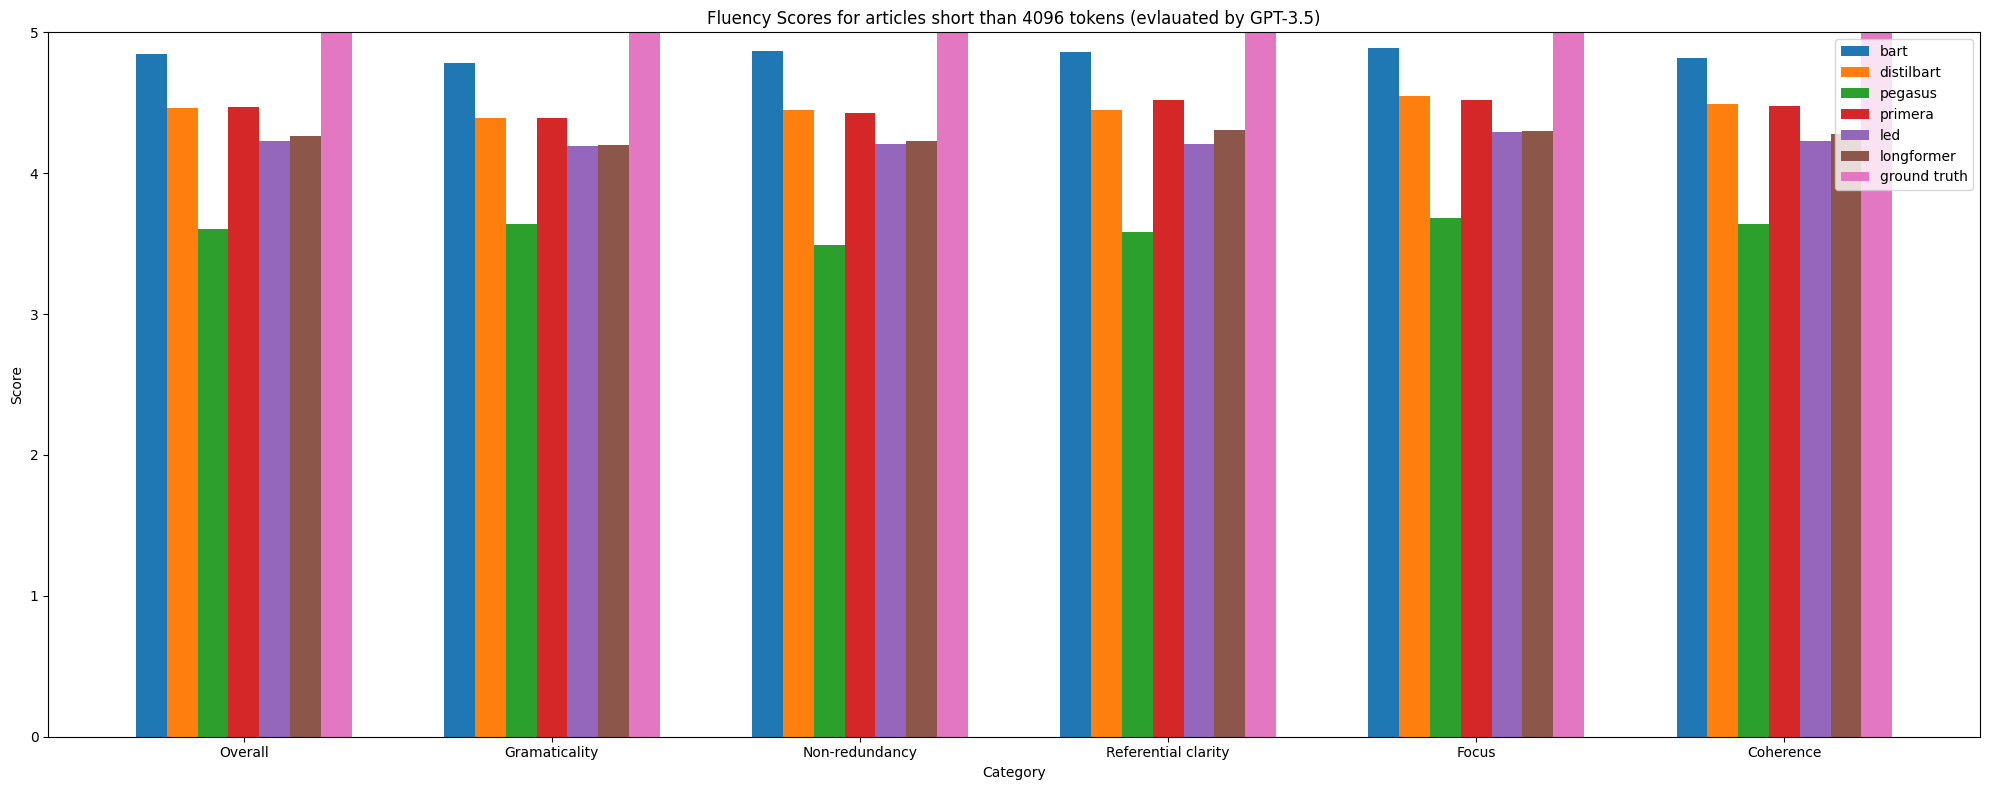

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
# Data
groups = ['Overall', 'Gramaticality', 'Non-redundancy', 'Referential clarity', 'Focus', 'Coherence']
model = 'bart-pubmed-20k'
scores_1 = [overall[0], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 1 bart
model = 'distilbart-pubmed-20k'
scores_2 = [overall[1], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 2 dis
model = 'pegasus-pubmed-20k'
scores_3 = [overall[2], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 3 peg
model = 'primera-pubmed-20k'
scores_4 = [overall[3], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 4 prim
model = 'led-pubmed-20k'
scores_5 = [overall[4], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 5 led
model = 'longformer-pubmed-20k'
scores_6 = [overall[5], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 6 long
model = 'truth'
scores_7 = [overall[6], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 7 truth


# Set the width of the bars
bar_width = 0.1

# Set the x locations for the groups
x = np.arange(len(groups))

# Plotting the bars
plt.bar(x - bar_width*3, scores_1, width=bar_width, label='bart')
plt.bar(x - bar_width*2, scores_2, width=bar_width, label='distilbart')
plt.bar(x - bar_width, scores_3, width=bar_width, label='pegasus')
plt.bar(x, scores_4, width=bar_width, label='primera')
plt.bar(x + bar_width, scores_5, width=bar_width, label='led')
plt.bar(x + bar_width*2, scores_6, width=bar_width, label='longformer')
plt.bar(x + bar_width*3, scores_7, width=bar_width, label='ground truth')

# Adding labels
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Fluency Scores for articles short than 4096 tokens (evlauated by GPT-3.5)')
plt.xticks(x, groups)
plt.ylim(0, 5)  # Set y-axis limits from 0 to 5

# Adding legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


# Get fluency stats from recursively generated abstracts

In [ ]:
rec_df = pd.read_csv('/content/drive/My Drive/pubmed/recursive_abstracts_fluency_score.csv')

In [ ]:
import numpy as np
bart_rec = np.array(rec_df['bart_rec'])
# overall[0], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]
lens = 72 # len(bart_rec) # 72
bar_avg = [(sum(row[i] for row in bart_rec) for i in range(lens))/lens]
bar_avg

bar = bar/lens

In [ ]:
peg_rec = np.array(rec_df['peg_rec'])#, dtype=int)
peg_avg = np.sum(peg_rec, axis=0)
peg_avg

peg = peg_avg/lens

array([246, 243, 251, 259, 258])

In [ ]:
dis_rec = np.array(rec_df['dis_rec'])#, dtype=int)
dis_avg = np.sum(dis_rec, axis=0)
dis_avg

dis = dis_avg/lens

In [ ]:
# bart_higher =  [ v + 1 for v in bart]
# dis_higher =  [ v + 1 for v in dis]
# peg_higher =  [ v + 1 for v in peg]

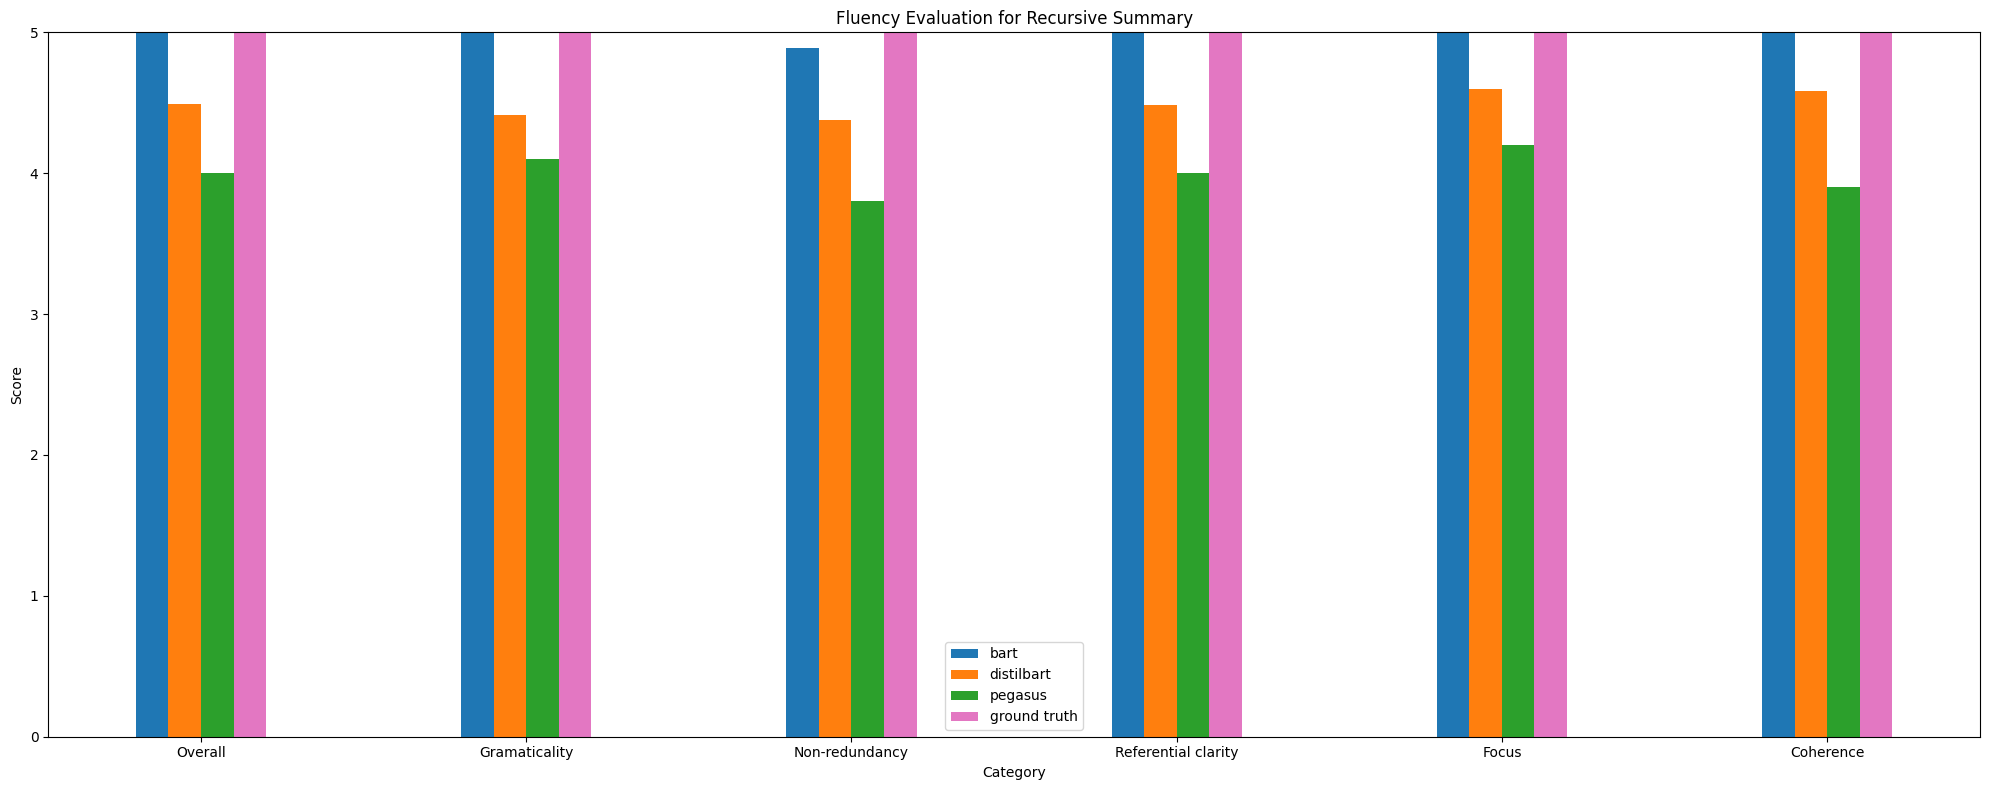

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
# Data
groups = ['Overall', 'Gramaticality', 'Non-redundancy', 'Referential clarity', 'Focus', 'Coherence']
model = 'bart-pubmed-20k'
scores_1 = [bart[0],bart[1],bart[2],bart[3],bart[4],bart[5]] # 1 bart
model = 'distilbart-pubmed-20k'
scores_2 = [dis[0],dis[1],dis[2],dis[3],dis[4],dis[5]] # 2 dis
model = 'pegasus-pubmed-20k'
scores_3 = [peg[0],peg[1],peg[2],peg[3],peg[4],peg[5]] # 3 peg
model = 'primera-pubmed-20k'
scores_4 = ground_truth_score

# Set the width of the bars
bar_width = 0.1

# Set the x locations for the groups
x = np.arange(6)#len(groups))

# Plotting the bars
plt.bar(x - bar_width*2 + bar_width/2, scores_1, width=bar_width, label='bart')
plt.bar(x - bar_width + bar_width/2, scores_2, width=bar_width, label='distilbart')
plt.bar(x + bar_width/2, scores_3, width=bar_width, label='pegasus')
plt.bar(x + bar_width + bar_width/2, scores_4, width=bar_width, label='ground truth', color='#e377c2')#(0.92, 0.49, 0.8,1.0))

# Adding labels
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Fluency Evaluation for Recursive Summary')
plt.xticks(x, groups)
plt.ylim(0, 5)  # Set y-axis limits from 0 to 5

# Adding legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
# Data
groups = ['Overall', 'Gramaticality', 'Non-redundancy', 'Referential clarity', 'Focus', 'Coherence']
model = 'bart-pubmed-20k'
scores_1 = [bart[0],bart[1],bart[2],bart[3],bart[4],bart[5]] # 1 bart
model = 'distilbart-pubmed-20k'
scores_2 = [dis[0],dis[1],dis[2],dis[3],dis[4],dis[5]] # 2 dis
model = 'pegasus-pubmed-20k'
scores_3 = [peg[0],peg[1],peg[2],peg[3],peg[4],peg[5]] # 3 peg
model = 'primera-pubmed-20k'
scores_4 = ground_truth_score

# Set the width of the bars
bar_width = 0.1

# Set the x locations for the groups
x = np.arange(6)#len(groups))

# Plotting the bars
plt.bar(x - bar_width*2 + bar_width/2, scores_1, width=bar_width, label='bart')
plt.bar(x - bar_width + bar_width/2, scores_2, width=bar_width, label='distilbart')
plt.bar(x + bar_width/2, scores_3, width=bar_width, label='pegasus')
plt.bar(x + bar_width + bar_width/2, scores_4, width=bar_width, label='ground truth')

# Adding labels
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Fluency Evaluation for Recursive Summary')
plt.xticks(x, groups)
plt.ylim(0, 5)  # Set y-axis limits from 0 to 5

# Adding legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


# Save generated_abstracts_4096_fluency_eval

In [ ]:
df.to_csv('/content/drive/My Drive/pubmed/generated_abstracts_4096_fluency_eval.csv', index=False)

# df.to_csv('/content/drive/My Drive/pubmed/generated_abstracts_4096_fluency_eval_added1.csv', index=False)

# Check out stats & Plot for abstracts with 1024 token texts only


In [ ]:
df = pd.DataFrame(scores1024)
df['index'] = truth_df1024['Unnamed: 0']
df = df.rename(columns={"text1": 'bart-pubmed-20k', "text2": "distilbart-pubmed-20k", "text3": "pegasus-pubmed-20k", "text4": "primera-pubmed-20k", "text5": "led-pubmed-20k", "text6": "longformer-pubmed-20k", "text7": "truth", })

print(len(df))
df.head()


71


,bart-pubmed-20k,distilbart-pubmed-20k,pegasus-pubmed-20k,primera-pubmed-20k,led-pubmed-20k,longformer-pubmed-20k,truth,index
0,"[4, 5, 5, 5, 4]","[4, 5, 4, 4, 4]","[3, 3, 3, 3, 3]","[5, 5, 5, 5, 5]","[4, 4, 4, 4, 4]","[3, 4, 3, 4, 4]","[5, 5, 5, 5, 5]",15
1,"[4, 4, 4, 5, 4]","[4, 4, 4, 5, 4]","[3, 3, 3, 4, 3]","[4, 4, 4, 5, 4]","[4, 4, 4, 5, 4]","[4, 4, 4, 5, 4]","[4, 4, 4, 5, 4]",38
2,"[4, 4, 4, 5, 4]","[3, 3, 3, 5, 4]","[4, 4, 4, 5, 4]","[4, 4, 4, 5, 4]","[3, 3, 3, 5, 4]","[3, 3, 3, 5, 4]","[4, 4, 4, 5, 4]",56
3,"[4, 4, 4, 5, 4]","[3, 3, 3, 4, 4]","[4, 4, 4, 5, 4]","[4, 4, 4, 5, 4]","[3, 3, 3, 4, 4]","[3, 3, 3, 4, 4]","[4, 4, 4, 5, 4]",163
4,"[4, 4, 4, 5, 4]","[3, 3, 3, 4, 4]","[4, 4, 4, 5, 5]","[4, 4, 4, 5, 4]","[3, 3, 3, 4, 4]","[3, 3, 3, 4, 4]","[4, 4, 4, 5, 5]",207


In [ ]:
bart_mean, distilbart_mean, pegasus_mean, primera_mean, led_mean, longformer_mean, truth_mean = [], [], [], [], [], [], []
for i, row in df.iterrows():
  bart_mean.append(statistics.mean(row['bart-pubmed-20k']))
  distilbart_mean.append(statistics.mean(row['distilbart-pubmed-20k']))
  pegasus_mean.append(statistics.mean(row['pegasus-pubmed-20k']))
  primera_mean.append(statistics.mean(row['primera-pubmed-20k']))
  led_mean.append(statistics.mean(row['led-pubmed-20k']))
  longformer_mean.append(statistics.mean(row['longformer-pubmed-20k']))
  truth_mean.append(statistics.mean(row['truth']))

df['bart_avg'], df['distilbart_avg'], df['pegasus_avg'], df['primera_avg'], df['led_avg'], df['longformer_avg'], df['truth_avg'] = bart_mean, distilbart_mean, pegasus_mean, primera_mean, led_mean, longformer_mean, truth_mean
df.head()

# 'Overall', 'Gramaticality', 'Non-redundancy', 'Referential clarity', 'Focus', 'Coherence'
# Overall, get average of
overall_cols = ['bart_avg',	'distilbart_avg',	'pegasus_avg',	'primera_avg',	'led_avg',	'longformer_avg',	'truth_avg']
overall = []
for col in overall_cols:
  avg = (df[col].describe()['mean'])
  overall.append((df[col].describe()['mean']))
  print(col)
  print(avg)
print(overall)

# bart-pubmed-20k	distilbart-pubmed-20k	pegasus-pubmed-20k	primera-pubmed-20k	led-pubmed-20k	longformer-pubmed-20k	truth
# 'Gramaticality', 'Non-redundancy', 'Referential clarity', 'Focus', 'Coherence'
models = ['bart-pubmed-20k',	'distilbart-pubmed-20k',	'pegasus-pubmed-20k',	'primera-pubmed-20k',	'led-pubmed-20k',	'longformer-pubmed-20k',	'truth']
grammar, redundancy, referential, focus, coherence = dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]}),  dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]}),  dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]}),  dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]}),  dict({'bart-pubmed-20k':[], 'distilbart-pubmed-20k':[], 'pegasus-pubmed-20k':[], 'primera-pubmed-20k':[], 'led-pubmed-20k':[], 'longformer-pubmed-20k':[], 'truth':[]})
for i, row in df.iterrows():
  for model in models:
    grammar[model].append(row[model][0]) # 0 grammar
    redundancy[model].append(row[model][1]) # 1 redundancy
    referential[model].append(row[model][2]) # 2 refer
    focus[model].append(row[model][3]) # 3 focus
    coherence[model].append(row[model][4]) # 4 model


for model in models:
  grammar[model] = statistics.mean(grammar[model])
  redundancy[model] = statistics.mean(redundancy[model])
  referential[model] = statistics.mean(referential[model])
  focus[model] = statistics.mean(focus[model])
  coherence[model] = statistics.mean(coherence[model])

print(grammar)
print(redundancy)
print(referential)
print(focus)
print(coherence)


bart_avg
4.861971830985915
distilbart_avg
2.6140845070422536
pegasus_avg
4.904225352112677
primera_avg
4.943661971830986
led_avg
2.616901408450704
longformer_avg
3.9352112676056334
truth_avg
4.645070422535212
[4.861971830985915, 2.6140845070422536, 4.904225352112677, 4.943661971830986, 2.616901408450704, 3.9352112676056334, 4.645070422535212]
{'bart-pubmed-20k': 4.76056338028169, 'distilbart-pubmed-20k': 2.563380281690141, 'pegasus-pubmed-20k': 4.873239436619718, 'primera-pubmed-20k': 4.929577464788732, 'led-pubmed-20k': 2.591549295774648, 'longformer-pubmed-20k': 3.887323943661972, 'truth': 4.52112676056338}
{'bart-pubmed-20k': 4.774647887323944, 'distilbart-pubmed-20k': 2.5774647887323945, 'pegasus-pubmed-20k': 4.887323943661972, 'primera-pubmed-20k': 4.929577464788732, 'led-pubmed-20k': 2.535211267605634, 'longformer-pubmed-20k': 3.9014084507042255, 'truth': 4.690140845070423}
{'bart-pubmed-20k': 4.887323943661972, 'distilbart-pubmed-20k': 2.6056338028169015, 'pegasus-pubmed-20k': 4

In [ ]:
overall

[4.861971830985915,
 2.6140845070422536,
 4.904225352112677,
 4.943661971830986,
 2.616901408450704,
 3.9352112676056334,
 4.645070422535212]

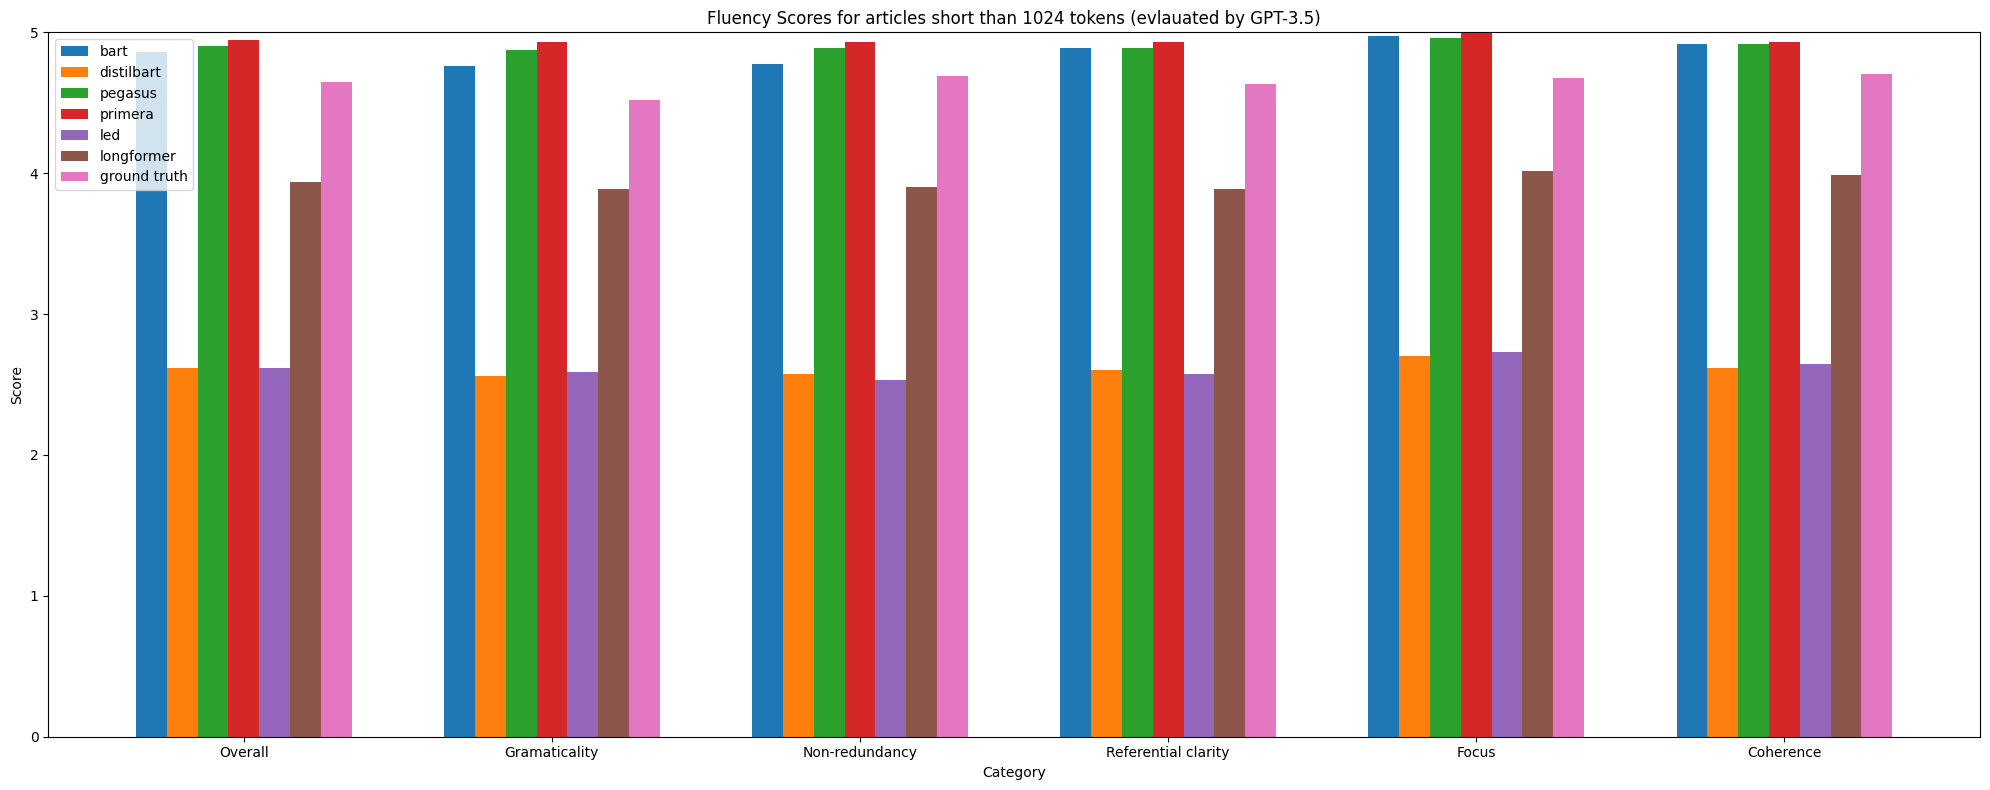

In [ ]:

plt.figure(figsize=(20, 8))
# Data
groups = ['Overall', 'Gramaticality', 'Non-redundancy', 'Referential clarity', 'Focus', 'Coherence']
model = 'bart-pubmed-20k'
scores_1 = [overall[0], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 1 bart
model = 'distilbart-pubmed-20k'
scores_2 = [overall[1], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 2 dis
model = 'pegasus-pubmed-20k'
scores_3 = [overall[2], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 3 peg
model = 'primera-pubmed-20k'
scores_4 = [overall[3], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 4 prim
model = 'led-pubmed-20k'
scores_5 = [overall[4], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 5 led
model = 'longformer-pubmed-20k'
scores_6 = [overall[5], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 6 long
model = 'truth'
scores_7 = [overall[6], grammar[model], redundancy[model], referential[model], focus[model], coherence[model]] # 7 truth


# Set the width of the bars
bar_width = 0.1

# Set the x locations for the groups
x = np.arange(len(groups))

# Plotting the bars
plt.bar(x - bar_width*3, scores_1, width=bar_width, label='bart')
plt.bar(x - bar_width*2, scores_2, width=bar_width, label='distilbart')
plt.bar(x - bar_width, scores_3, width=bar_width, label='pegasus')
plt.bar(x, scores_4, width=bar_width, label='primera')
plt.bar(x + bar_width, scores_5, width=bar_width, label='led')
plt.bar(x + bar_width*2, scores_6, width=bar_width, label='longformer')
plt.bar(x + bar_width*3, scores_7, width=bar_width, label='ground truth')

# Adding labels
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Fluency Scores for articles short than 1024 tokens (evlauated by GPT-3.5)')
plt.xticks(x, groups)
plt.ylim(0, 5)  # Set y-axis limits from 0 to 5

# Adding legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('/content/drive/My Drive/pubmed/generated_abstracts_1024_fluency_eval.csv', index=False)

---

# Discovery & Conclusion

For longer articles (4096 tokens):


Among the small models (input limited to 1024 tokens) (bart, distilbart, pegasus):

- bart results are considered to be very fluent in every category, while pegasus's result is the least fluent


--


Among the long models (input limited to 4096 tokens) (primera, led, longformer):

- Primera results are considered to be fluent in every category, while led and longformer's results are similar, that being said, all three of them aren't as good as bart, they are aobut the same level as distilbart.

---

For shorter articles (1024 tokens):

- bart, pegasus and primera perform the best, almost as good or considered more fluent than the ground truth
- while longformer performed ok-ish
- distilbart and led perform equally bad

---
In conclusion
- bart performs generally better, with primera falling behind slightly
- pegasus' performance vary a lot whether the article is truncated
- when given full article, distilbart and led perform poorer than others
